In [8]:
from scipy.sparse import load_npz
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB






#Load csv files
DATASET_ENCODING = "ISO-8859-1"
y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_train = pd.read_csv('X_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)



C:\Users\Thamires\AppData\Local\Temp\ipykernel_13820\1381117039.py:55: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_13820\1381117039.py:56: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_13820\1381117039.py:57: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_13820\1381117039.py:58: FutureWarning: 

In [2]:
# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# save it into sparse matrix format
# save_npz('X_train.npz', X_train_vec) #model do save sparse matrix
# save_npz('X_test.npz', X_test_vec)

Vectorizer fitted.
No. of feature_words:  248706


In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

class myWord2Vec:
    def __init__(self, corpus, vector_size, window, min_count, n_proc, epochs):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.n_proc = n_proc
        self.epochs = epochs
        self.model = self.get_w2v_vectorizer(corpus)
        
    def tokenize(self,df):
        corpus = []
        j = 0
        for col in df:
            word_list = col.split(" ")
            word_list = ' '.join(word_list).split()
            tagged = TaggedDocument(word_list, [j])
            j = j+1
            corpus.append(tagged)
        return corpus

    def get_w2v_vectorizer(self, corpus):
        corpus = self.tokenize(corpus)
        model = Doc2Vec(vector_size=self.vector_size,
                        window=self.window,
                        min_count=self.min_count,
                        workers=self.n_proc,
                        epochs = self.epochs)
        model.build_vocab(corpus)
        model.train(corpus, total_examples=model.corpus_count
                , epochs=model.epochs)
        return model

    def text_w2v_vectorize(self, text):
        vectorized = self.model.infer_vector(text.split(' '))
        return vectorized

    def df_w2v_vectorize(self, df):
        card2vec = [self.text_w2v_vectorize(df.iloc[i])
                for i in range(0,len(df))]
        return card2vec

In [4]:
# Evaluate Model Function

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## BernouilliNB Model

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       983
           1       0.77      0.74      0.76      1016

    accuracy                           0.76      1999
   macro avg       0.76      0.76      0.76      1999
weighted avg       0.76      0.76      0.76      1999



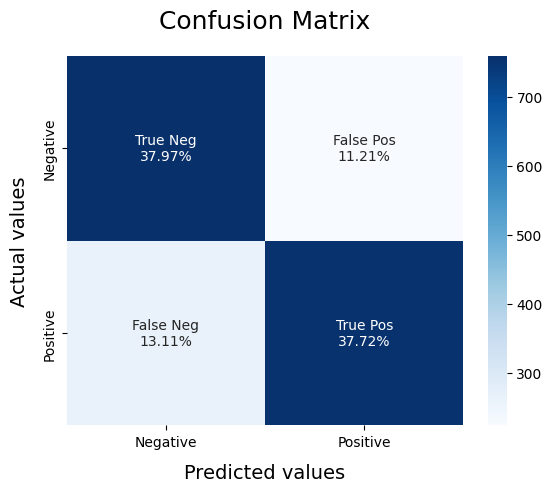

In [5]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_vec, y_train)
model_Evaluate(BNBmodel)

# Gaussian Naive Bayes

In [11]:
# Create Word2Vec embeddings using myWord2Vec class
w2v = myWord2Vec(X_train, vector_size=50, window=2, min_count=5, n_proc=4, epochs=10)
X_train_w2v = w2v.df_w2v_vectorize(X_train)
X_test_w2v = w2v.df_w2v_vectorize(X_test)

# Train the Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(X_train_w2v, y_train)

# Evaluate the performance of the classifier on the testing set
y_pred = gnb.predict(X_test_w2v)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6388194097048524


# LinearSVC Model

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       983
           4       0.77      0.73      0.75      1016

    accuracy                           0.75      1999
   macro avg       0.75      0.75      0.75      1999
weighted avg       0.75      0.75      0.75      1999



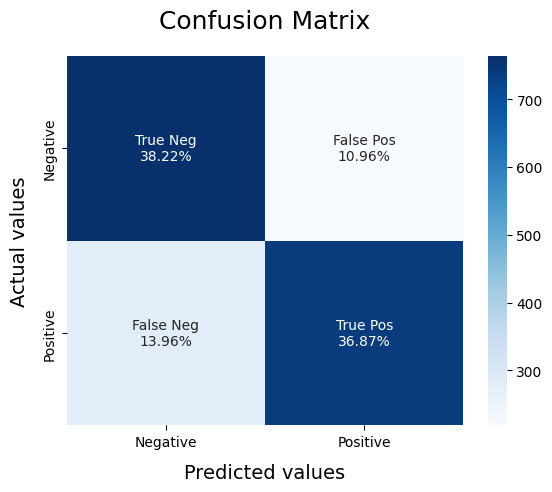

In [5]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vec, y_train)
model_Evaluate(SVCmodel)

# Logistic Regression Model

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       983
           4       0.77      0.74      0.75      1016

    accuracy                           0.75      1999
   macro avg       0.76      0.76      0.75      1999
weighted avg       0.76      0.75      0.75      1999



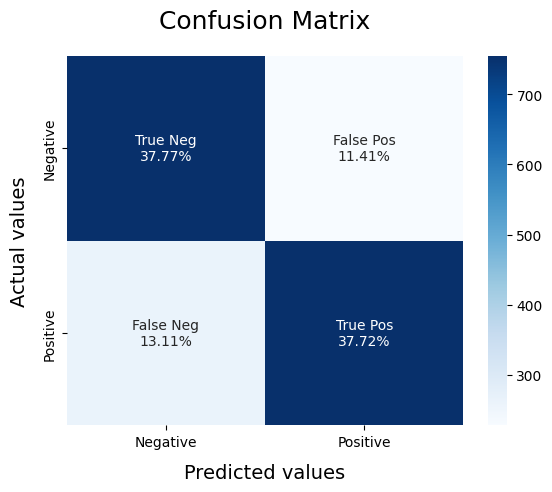

In [7]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_vec, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       983
           1       0.97      0.03      0.05      1016

    accuracy                           0.51      1999
   macro avg       0.73      0.51      0.36      1999
weighted avg       0.74      0.51      0.35      1999



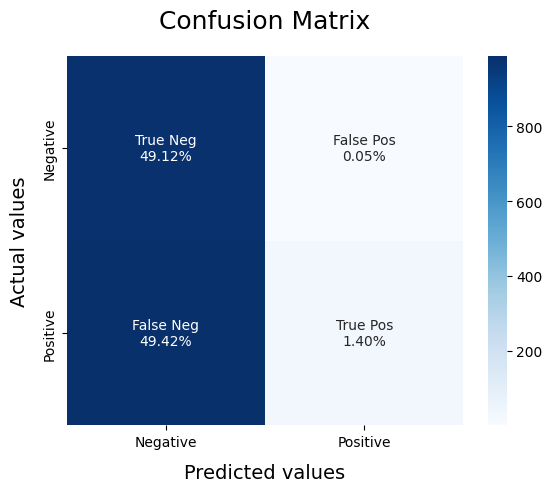

In [15]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_vec, y_train)
model_Evaluate(KNN)
